In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MolToSmiles, Draw
from collections import Counter
import matplotlib.pyplot as plt

### Animalia

In [3]:
df = pd.read_csv('../../results/predictions/animalia_big_rationales.csv')
df

,smiles,class_0,rationale_0,rationale_0_score
0,O[C@H]1[C@H](O)[C@H](O[C@@H](OC[C@@H](O[C@@H](...,1.0,C(CC[CH2:1][CH2:1]N[CH2:1][CH2:1]CCCCCCCC1C[CH...,1.000000
1,O[C@H]1[C@H](O)[C@H](O[C@@H](OC[C@@H](O[C@@H](...,1.0,C(=C\CCC[CH2:1][CH2:1]N[CH3:1])\CCCCC1C[CH2:1]1,1.000000
2,[C@@H]1([C@H](O[C@@H](O[C@@H]([C@H](N)C)CCCCCC...,1.0,C[C@@H](N)[C@H](O)CCCCCCCCCCCCCC[CH2:1]CCCCCCC...,1.000000
3,[C@@H]1(O)[C@H](O[C@@H](O[C@@H]([C@@H](N)CO)CC...,1.0,C[C@@H](N)[CH2:1]CCCCCCCCCCCCCC[CH2:1]CCCCCCC[...,0.976932
4,[C@@H](C#CC#CCO)(O)CCCCCCCCC\C=C/CCCCCCCC,1.0,CCCCCCCC/C=C\CCCCCCCCC[C@@H](O)[CH3:1],1.000000
...,...,...,...,...
8060,C1C[C@](C)(C(=CCC2([C@@]([H])([C@](C)(CCCC(=C)...,1.0,C1=C2[C@@H](CC[CH2:1][C:1]2)[C:1]2C[CH2:1][C@H...,1.000000
8061,C1C[C@](C)(C(=CCC2([C@@]([H])([C@](C)(CCCC(C)C...,1.0,C1=C2[C@@H](CC[CH2:1][C:1]2)[C:1]2C[CH2:1][C@H...,1.000000
8062,C1C[C@](C)(C(=CCC2([C@@]([H])([C@](C)(CCC(O)C(...,1.0,C1=C2[C@@H](CC[CH2:1][C:1]2)[C:1]2C[CH2:1][C@H...,1.000000
8063,C1C[C@](C)(C(=CCC2([C@@]([H])([C@](C)(CCC(=O)C...,1.0,C1=C2[C@@H](CC[CH2:1][C:1]2)[C:1]2C[CH2:1][C@H...,1.000000


In [4]:
canonical_rationales = []

In [5]:
from rdkit import Chem
from rdkit.Chem import MolToSmiles

canonical_rationales = []

def remove_atom_mapping(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)
        return Chem.MolToSmiles(mol, canonical=True)
    else:
        return None

for index, row in df.iterrows():
    rationales = [row["rationale_0"]]
    for rationale in rationales:
        if pd.notnull(rationale):
            canonical_rationale = remove_atom_mapping(rationale)
            if canonical_rationale:
                canonical_rationales.append(canonical_rationale)


In [7]:
top_rationales = rationale_counts.most_common(20)
for rationale, count in top_rationales:
    print(f"Substructure: {rationale}, Count: {count}")

Substructure: [C]1CCC[C@H]2[C@@H]3CCC[C]3CC[C@H]12, Count: 116
Substructure: C1=C2CCCC[C]2[C@H]2CC[C]3CCC[C@H]3[C@@H]2C1, Count: 116
Substructure: [C]1[C][C@H]2CC[C]3CCC[C@H]3[C@@H]2CC1, Count: 55
Substructure: [C]1CC[C@H]2[C](C1)CC[C@H]1CCCC[C]12, Count: 37
Substructure: N[C@H]1[C@H](OC[C@@H]2CCC[C@@H](O[C@@H]3CCCOC3)O2)O[C@H](CO)[C@H](O)[C@@H]1O[C@H]1CCCCO1, Count: 37
Substructure: [C]1OC[C@]23CC=C4[C]5CCCC[C@@H]5CC[C@H]4[C]2CC[C@H]13, Count: 37
Substructure: CCCc1cccnc1, Count: 33
Substructure: [C]1OC[C@]23CCCC[C]2CC[C@H]13.[Na+], Count: 32
Substructure: C1CC[C]2[C](C1)CC[C@H]1[C@@H]3CCC[C]3CC[C@H]21, Count: 31
Substructure: C=C1CCC[C@H]2[C](CC3=CCC=CC3)CCC[C]12, Count: 31
Substructure: [C]1CC[C@H]2CC[C@@H]3OCC[C@]3(CC1)O2, Count: 29
Substructure: C1CC[C@@H]2CC[C]3[C@@H]4CCC[C]4CC[C@@H]3[C]2C1, Count: 27
Substructure: C1CC[C@@H]2CC[C]3CCC[C@H]3[C]2C1, Count: 26
Substructure: [C]1CCCCC[C@@H]2CC[C@H]1O2, Count: 26
Substructure: C=CCCc1ccoc1, Count: 25
Substructure: [C]1CCC[C][C@H]2CC[

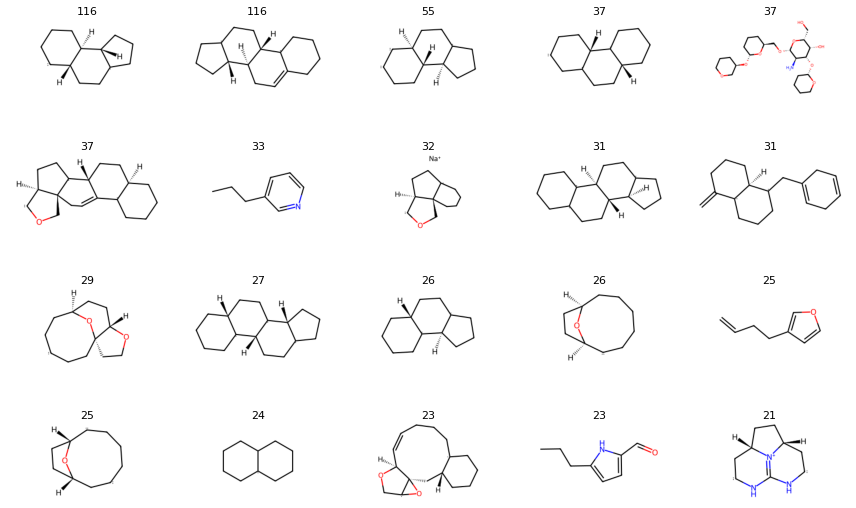

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import io

fig, axes = plt.subplots(4, 5, figsize=(12, 8))
axes = axes.flatten()

draw_options = Draw.rdMolDraw2D.MolDrawOptions()
draw_options.fixedBondLength = 25

for i, (rationale, count) in enumerate(top_rationales):
    mol = Chem.MolFromSmiles(rationale)
    if mol:
        drawer = Draw.MolDraw2DCairo(300, 150)
        drawer.SetDrawOptions(draw_options)
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        img = drawer.GetDrawingText()

        axes[i].imshow(plt.imread(io.BytesIO(img), format='png'))
        axes[i].set_title(f"{count}", fontsize=11, pad=1)
        axes[i].axis('off')

for j in range(len(top_rationales), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.savefig('../../results/figures/animalia_top_rationales.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()


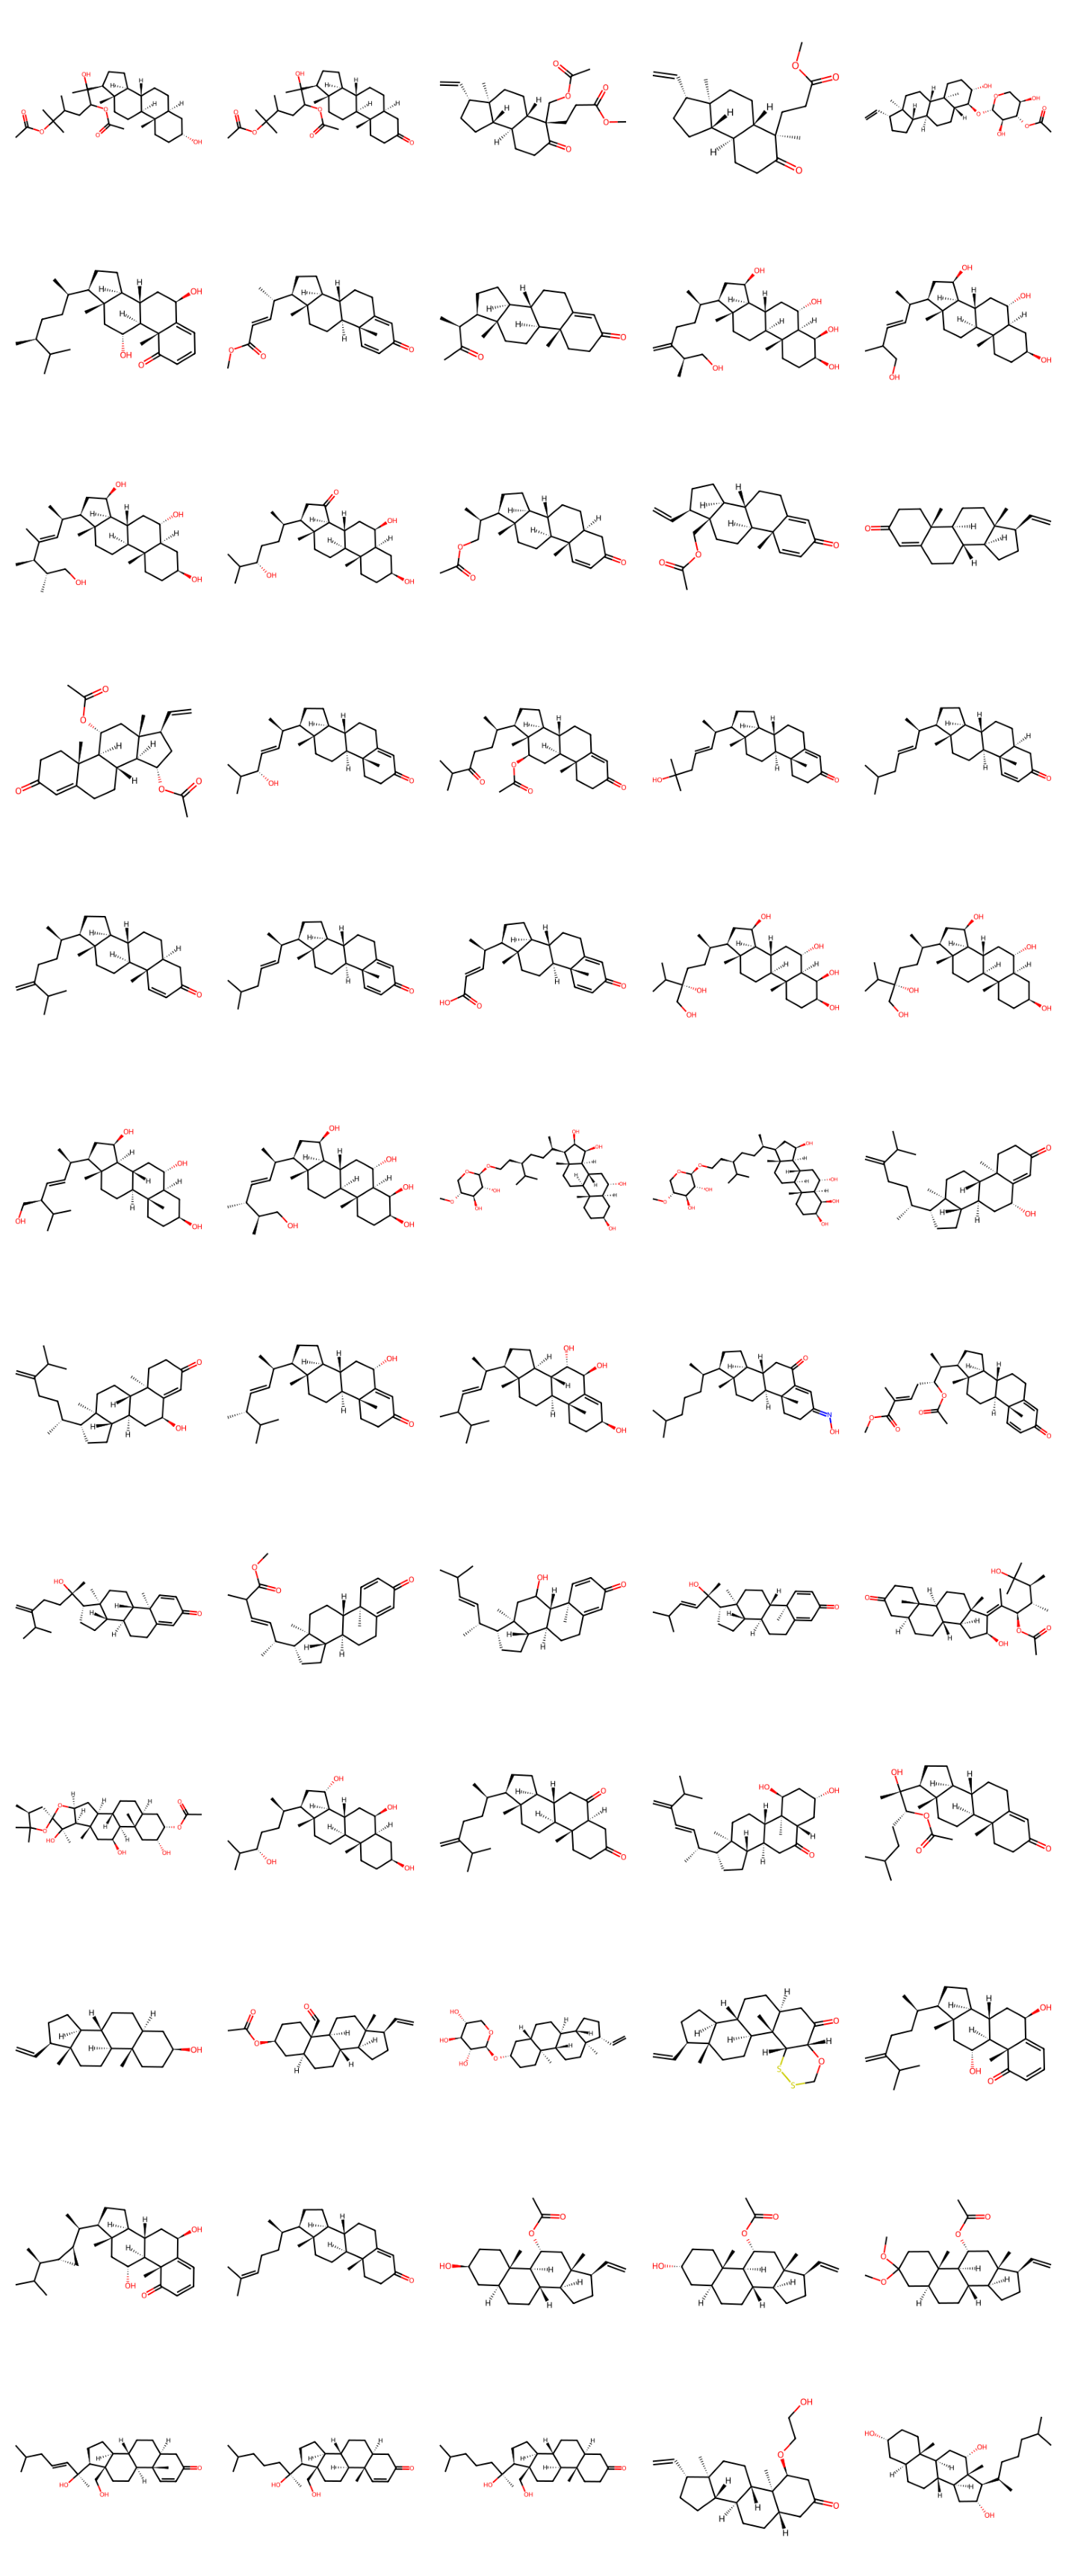

In [9]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

target_rationale = top_rationales[0][0]
def remove_atom_mapping_and_canonicalize(smiles):
    if not isinstance(smiles, str):
        return None
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)
        return Chem.MolToSmiles(mol, canonical=True)
    return None

df["rationale_canon"] = df["rationale_0"].apply(remove_atom_mapping_and_canonicalize)

matching_smiles = df[df["rationale_canon"] == target_rationale]["smiles"].dropna().tolist()

max_display = 60
rows = min(len(matching_smiles) // 5 + 1, max_display // 5)
fig, axes = plt.subplots(rows, 5, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, smiles in enumerate(matching_smiles[:max_display]):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol)
        axes[i].imshow(img)
        axes[i].axis('off')

for j in range(len(matching_smiles), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Bacteria

In [10]:
df_bac = pd.read_csv('../../results/predictions/bacteria_big_rationales.csv')
df_bac

,smiles,class_1,rationale_0,rationale_0_score
0,C(O[C@H](O[C@H](CO[C@H](O[C@H](CO)[C@@H](O)[C@...,1.000000,OCC(O)CO[C@@H]1O[C@H](CO[C@@H]2O[CH2:1][CH2:1]...,0.953629
1,C(O[C@H](O[C@H](CO[C@H](O[C@H](CO)[C@@H](O)[C@...,1.000000,C(O[C@@H]1O[CH2:1][CH2:1][CH2:1][CH2:1]1)[CH2:...,0.999959
2,C(O[C@H](O[C@H](CO[C@H](O[C@H](CO)[C@@H](O)[C@...,1.000000,CCCCCCCCCCCCCCCCCOCC(CO[C@@H]1O[C@H](CO[C@@H]2...,0.999331
3,C(O[C@@H](O[C@H](CO)[C@H]1O)[C@@H](O)[C@H]1O[C...,1.000000,C(CCC[CH3:1])CCC[CH3:1],1.000000
4,C(O[C@@H](O[C@H](CO)[C@H]1O)[C@@H](O)[C@H]1O[C...,1.000000,C(CCC[CH3:1])CCC[CH3:1],1.000000
...,...,...,...,...
2492,OC(=O)CCCCCCCC=C=C[C@@H](O)[C@@H](O)CCCCC,1.000000,CCCCC[C@H](O)[C@H](O)C=C=[CH2:1],0.999858
2493,C(CCCCCCC#C\C=C\[C@@H](O)CCCCC)C(O)=O,0.999999,O=C(O)CCCCC[CH3:1],1.000000
2494,O(C=C)c1ccccc1C,1.000000,Cc1ccccc1O[CH3:1],0.980311
2495,C1CCC\C(=C/Cl)\C[C@@H](C(C)(C)C)OC(=O)C\C=C\N(...,1.000000,C[C@@H]1CCCC[CH2:1]C[C@@H]([CH:1](C)C)OC(=O)C/...,1.000000


In [11]:
canonical_rationales = []

In [12]:
from rdkit import Chem
from rdkit.Chem import MolToSmiles

canonical_rationales = []

def remove_atom_mapping(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)
        return Chem.MolToSmiles(mol, canonical=True)
    else:
        return None

for index, row in df_bac.iterrows():
    rationales = [row["rationale_0"]]
    for rationale in rationales:
        if pd.notnull(rationale):
            canonical_rationale = remove_atom_mapping(rationale)
            if canonical_rationale:
                canonical_rationales.append(canonical_rationale)


In [13]:
top_rationales = rationale_counts.most_common(20)
for rationale, count in top_rationales:
    print(f"Substructure: {rationale}, Count: {count}")

Substructure: [C]1CCC[C@H]2[C@@H]3CCC[C]3CC[C@H]12, Count: 116
Substructure: C1=C2CCCC[C]2[C@H]2CC[C]3CCC[C@H]3[C@@H]2C1, Count: 116
Substructure: [C]1[C][C@H]2CC[C]3CCC[C@H]3[C@@H]2CC1, Count: 55
Substructure: [C]1CC[C@H]2[C](C1)CC[C@H]1CCCC[C]12, Count: 37
Substructure: N[C@H]1[C@H](OC[C@@H]2CCC[C@@H](O[C@@H]3CCCOC3)O2)O[C@H](CO)[C@H](O)[C@@H]1O[C@H]1CCCCO1, Count: 37
Substructure: [C]1OC[C@]23CC=C4[C]5CCCC[C@@H]5CC[C@H]4[C]2CC[C@H]13, Count: 37
Substructure: CCCc1cccnc1, Count: 33
Substructure: [C]1OC[C@]23CCCC[C]2CC[C@H]13.[Na+], Count: 32
Substructure: C1CC[C]2[C](C1)CC[C@H]1[C@@H]3CCC[C]3CC[C@H]21, Count: 31
Substructure: C=C1CCC[C@H]2[C](CC3=CCC=CC3)CCC[C]12, Count: 31
Substructure: [C]1CC[C@H]2CC[C@@H]3OCC[C@]3(CC1)O2, Count: 29
Substructure: C1CC[C@@H]2CC[C]3[C@@H]4CCC[C]4CC[C@@H]3[C]2C1, Count: 27
Substructure: C1CC[C@@H]2CC[C]3CCC[C@H]3[C]2C1, Count: 26
Substructure: [C]1CCCCC[C@@H]2CC[C@H]1O2, Count: 26
Substructure: C=CCCc1ccoc1, Count: 25
Substructure: [C]1CCC[C][C@H]2CC[

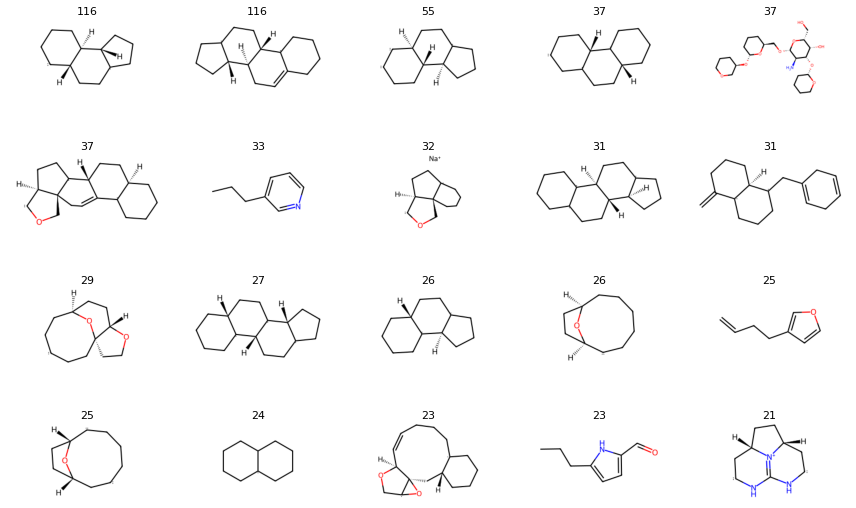

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import io

fig, axes = plt.subplots(4, 5, figsize=(12, 8))
axes = axes.flatten()

draw_options = Draw.rdMolDraw2D.MolDrawOptions()
draw_options.fixedBondLength = 25

for i, (rationale, count) in enumerate(top_rationales):
    mol = Chem.MolFromSmiles(rationale)
    if mol:
        drawer = Draw.MolDraw2DCairo(300, 150)
        drawer.SetDrawOptions(draw_options)
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        img = drawer.GetDrawingText()

        axes[i].imshow(plt.imread(io.BytesIO(img), format='png'))
        axes[i].set_title(f"{count}", fontsize=11, pad=1)
        axes[i].axis('off')

for j in range(len(top_rationales), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.savefig('../../results/figures/bacteria_top_rationales.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()


### Fungi

In [18]:
df_fun = pd.read_csv('../../results/predictions/fungi_big_rationales.csv')
df_fun

,smiles,class_2,rationale_0,rationale_0_score
0,[C@H]1(O[C@H](CCC)OC[C@H]1O)CO,1.0,OC[C@@H]1O[CH2:1]OC[C@H]1O,0.999986
1,C(CCCC(C1OC(=O)C=C1)O)CC(O)C,1.0,C1=C[CH2:1]OC1[CH2:1]CCCC[CH3:1],1.000000
2,C(CCCCC(O)\C=C\C(=O)O)CC(O)C,1.0,CC(O)CCCCC[CH3:1],1.000000
3,O1C(C)CCCCCC(O)C(=O)C(O)CC1=O,1.0,O=C1CC(O)[CH2:1][CH2:1]CCCCC[CH2:1]O1,0.997607
4,C(SC(C(=O)C(O)CCCCCC(C)O1)CC1=O)C(=O)O,1.0,O=C(O)CSC1C[CH2:1]O[CH2:1]CCCCC[CH2:1][CH2:1]1,0.971568
...,...,...,...,...
4449,C1(=O)CC(=C(COC(=O)C)[C@]([H])(C[C@]2(C)[C@@](...,1.0,C1[CH2:1][C:1][C@H]2[C@@H]3[C@H](O[CH2:1][CH2:...,1.000000
4450,C1(=O)CC(=C(COC(=O)CC(C)C)[C@]([H])(C[C@]2(C)[...,1.0,C1[CH2:1][C:1][C@H]2[C@@H]3[C@H](O[CH2:1][CH2:...,1.000000
4451,c1c(C)c(C(=O)Oc(cc(O)cc2C)c2O3)c3c(Cc4ccc(O)cc...,1.0,c1c[cH:1]ccc1Cc1c2c([cH:1]c[cH:1]1)[CH2:1]O[CH...,1.000000
4452,[C@@]12([H])[C@@]3(C(=O)N[C@H]1CC(C)C)[C@@H](\...,1.0,C[C@@H]1[C@H]2O[C@H]2[C@@H]2/C=C/[CH2:1]CCC[C@...,0.934147


In [19]:
canonical_rationales = []

In [20]:
from rdkit import Chem
from rdkit.Chem import MolToSmiles

canonical_rationales = []

def remove_atom_mapping(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)
        return Chem.MolToSmiles(mol, canonical=True)
    else:
        return None

for index, row in df_fun.iterrows():
    rationales = [row["rationale_0"]]
    for rationale in rationales:
        if pd.notnull(rationale):
            canonical_rationale = remove_atom_mapping(rationale)
            if canonical_rationale:
                canonical_rationales.append(canonical_rationale)


In [21]:
top_rationales = rationale_counts.most_common(20)
for rationale, count in top_rationales:
    print(f"Substructure: {rationale}, Count: {count}")

Substructure: [C]1CCC[C@H]2[C@@H]3CCC[C]3CC[C@H]12, Count: 116
Substructure: C1=C2CCCC[C]2[C@H]2CC[C]3CCC[C@H]3[C@@H]2C1, Count: 116
Substructure: [C]1[C][C@H]2CC[C]3CCC[C@H]3[C@@H]2CC1, Count: 55
Substructure: [C]1CC[C@H]2[C](C1)CC[C@H]1CCCC[C]12, Count: 37
Substructure: N[C@H]1[C@H](OC[C@@H]2CCC[C@@H](O[C@@H]3CCCOC3)O2)O[C@H](CO)[C@H](O)[C@@H]1O[C@H]1CCCCO1, Count: 37
Substructure: [C]1OC[C@]23CC=C4[C]5CCCC[C@@H]5CC[C@H]4[C]2CC[C@H]13, Count: 37
Substructure: CCCc1cccnc1, Count: 33
Substructure: [C]1OC[C@]23CCCC[C]2CC[C@H]13.[Na+], Count: 32
Substructure: C1CC[C]2[C](C1)CC[C@H]1[C@@H]3CCC[C]3CC[C@H]21, Count: 31
Substructure: C=C1CCC[C@H]2[C](CC3=CCC=CC3)CCC[C]12, Count: 31
Substructure: [C]1CC[C@H]2CC[C@@H]3OCC[C@]3(CC1)O2, Count: 29
Substructure: C1CC[C@@H]2CC[C]3[C@@H]4CCC[C]4CC[C@@H]3[C]2C1, Count: 27
Substructure: C1CC[C@@H]2CC[C]3CCC[C@H]3[C]2C1, Count: 26
Substructure: [C]1CCCCC[C@@H]2CC[C@H]1O2, Count: 26
Substructure: C=CCCc1ccoc1, Count: 25
Substructure: [C]1CCC[C][C@H]2CC[

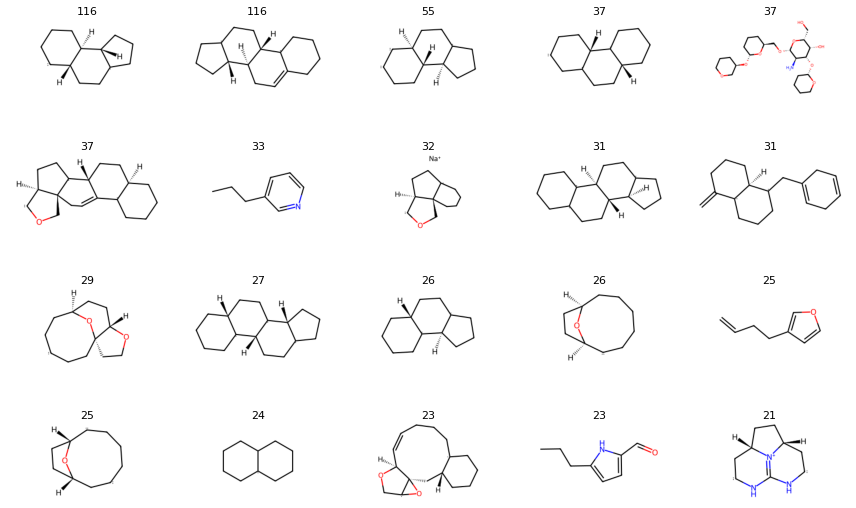

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import io

fig, axes = plt.subplots(4, 5, figsize=(12, 8))
axes = axes.flatten()

draw_options = Draw.rdMolDraw2D.MolDrawOptions()
draw_options.fixedBondLength = 25

for i, (rationale, count) in enumerate(top_rationales):
    mol = Chem.MolFromSmiles(rationale)
    if mol:
        drawer = Draw.MolDraw2DCairo(300, 150)
        drawer.SetDrawOptions(draw_options)
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        img = drawer.GetDrawingText()

        axes[i].imshow(plt.imread(io.BytesIO(img), format='png'))
        axes[i].set_title(f"{count}", fontsize=11, pad=1)
        axes[i].axis('off')

for j in range(len(top_rationales), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.savefig('../../results/figures/fungi_top_rationales.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()
